In [ ]:
Лабораторная работа 3
Цель: предсказывать факт наличия сердечного заболевания.
Задачи
Обучить логистическую регрессию, подобрать параметры
Сравним результаты L1, L2, оценить веса признаков
Провести отбор признаков с помощью L1 регуляризации, подобрать оптимальный С, объяcнить результат
Загрузим данные из ЛР 2.

In [3]:
#импорт необходимых модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

data = pd.read_csv('D:\MLlabs\heart.csv', sep=',')
data = data.drop(['Unnamed: 0'], axis='columns')
data = data.drop(['oldpeak'], axis='columns')

def gender_oppression(gender):
    if gender == 'male':
        return 1
    return 0

data['sex'] = data['sex'].apply(gender_oppression)

def chest(pain):
    if pain == 'light':
        return 0
    if pain == 'medium':
        return 1
    if pain == 'hard':
        return 2
    if pain == 'very hard':
        return 3
    return 4

data['cp'] = data['cp'].apply(chest)

X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 204 to 218
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       227 non-null    int64
 1   sex       227 non-null    int64
 2   cp        227 non-null    int64
 3   trestbps  227 non-null    int64
 4   chol      227 non-null    int64
 5   fbs       227 non-null    int64
 6   restecg   227 non-null    int64
 7   thalach   227 non-null    int64
 8   exang     227 non-null    int64
 9   slope     227 non-null    int64
 10  ca        227 non-null    int64
 11  thal      227 non-null    int64
dtypes: int64(12)
memory usage: 23.1 KB


Логистическая регрессия
Обучим логистическую регрессию и посмотрим результат. Для этого напишем функции: для отрисовки результата, для логистической регрессии без регуляризции, с L1, L2 регуляризции.

In [24]:

from sklearn.linear_model import LogisticRegression
# функция отрисовки результатов
def showResult(y_Test, test_predict, linear_model):
    rcParams['figure.figsize'] = 20,12
    x = np.arange(len(test_predict))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, test_predict, label='model result')
    ax.plot(x, y_Test, label='true result')
    plt.title(linear_model)
    ax.legend()
    plt.show()
    

    
def logistic_reg (y_dataTrain, dataTrain, y_dataTest, dataTest,l,c1):
    
    reg = LogisticRegression(penalty=l,C=c1, solver='liblinear', random_state=0)
    reg.fit(dataTrain, y_dataTrain)
    test_score = reg.score(dataTest, y_dataTest)
    print('----------------------------------------------------------------------------------------')
    print('Score Logistic Regression '+ l+'  :', test_score);
    print('Weight vector:', reg.coef_)
    print('C = ', c1)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'logistic_reg '+l)
    
def logistic_without_reg (y_dataTrain, dataTrain, y_dataTest, dataTest):
    
    reg = LogisticRegression(penalty='none', solver='newton-cg', random_state=0)
    reg.fit(dataTrain, y_dataTrain)
    test_score = reg.score(dataTest, y_dataTest)
    print('Score Logistic Regression  :', test_score);
    print('Weight vector:', reg.coef_)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'logistic_regression ')

    

Score Logistic Regression  : 0.7763157894736842
Weight vector: [[-0.01853125 -2.26952461  0.78875308 -0.02502192 -0.00433901  0.78129369
   0.46707392  0.0362694  -1.29761972  0.65141945 -0.92564214 -0.98943717]]


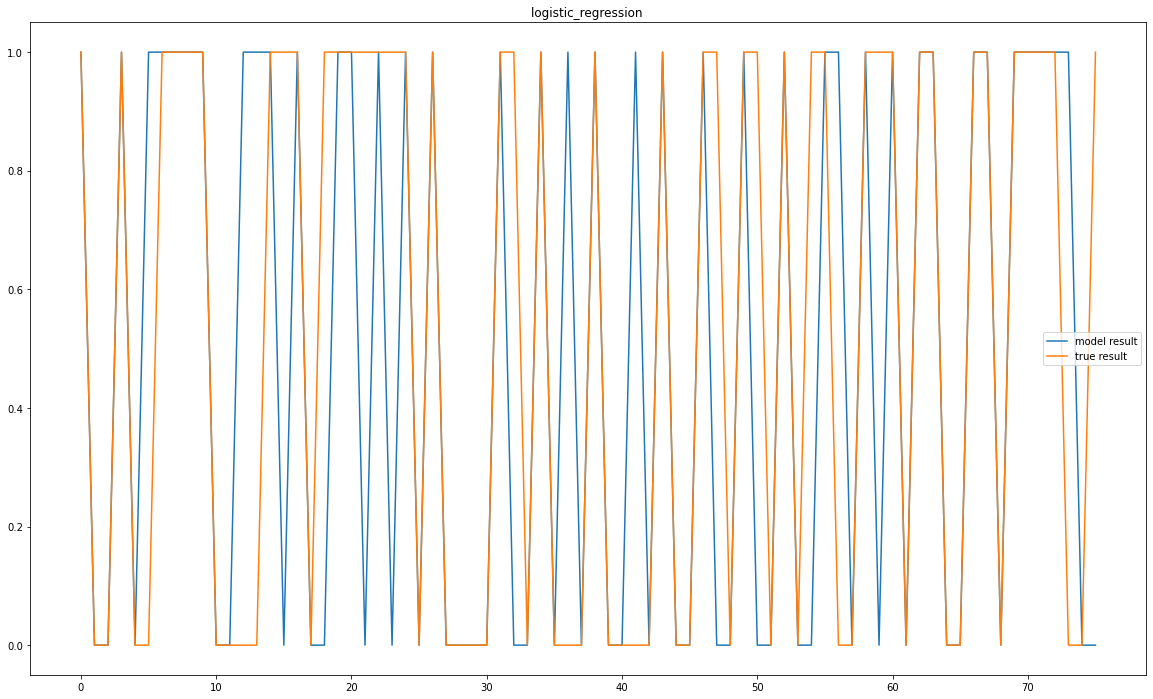

In [25]:
logistic_without_reg(y_train, X_train, y_test, X_test)

Так как С обратно пропорционален силе регуляризации, то можем заметить: чем больше С тем меньше гиперпараметр регуляризации и наоборот. В примере с L1 регуляризацией должна прослеживатьс закономерность, что при малом С гиперпараметр регуляризации большой => есть вероятность обнуления весов.

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.4605263157894737
Weight vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
C =  1e-05


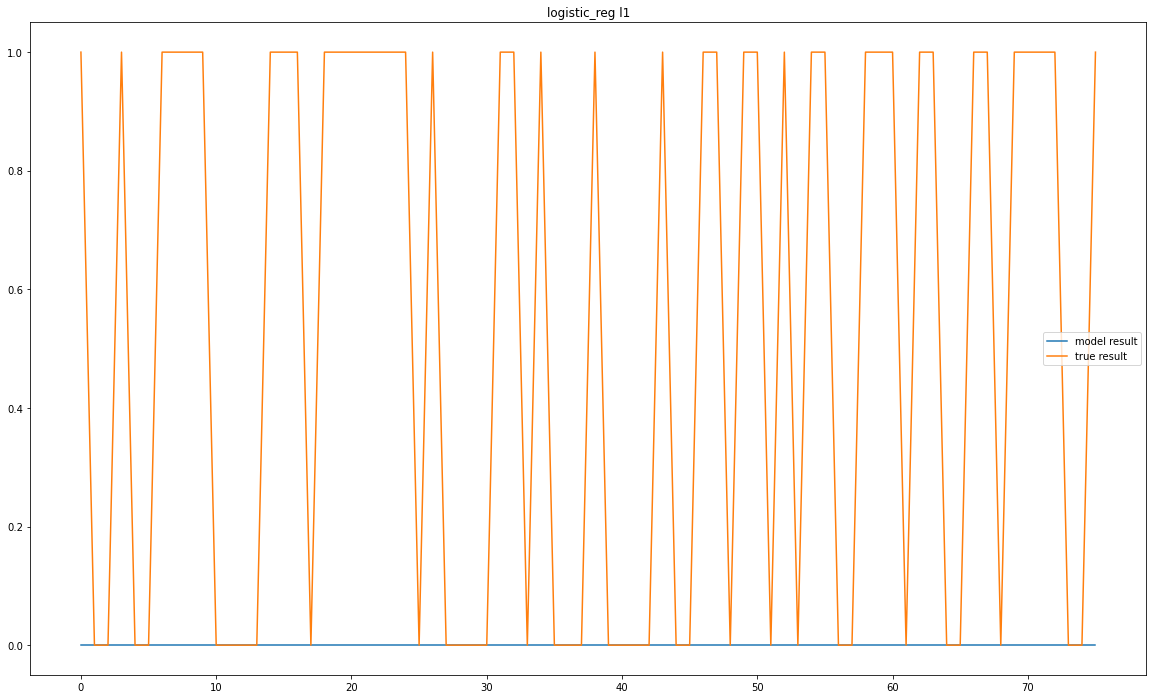

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.4605263157894737
Weight vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
C =  0.0001


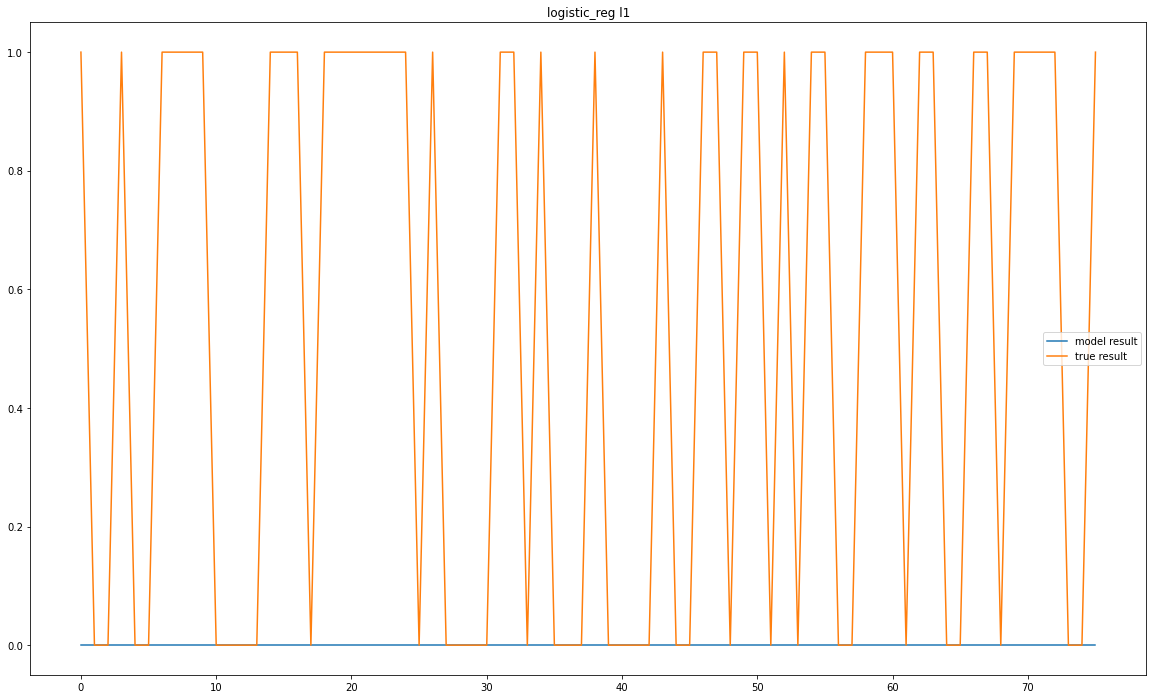

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.5394736842105263
Weight vector: [[0.         0.         0.         0.         0.         0.
  0.         0.00135105 0.         0.         0.         0.        ]]
C =  0.001


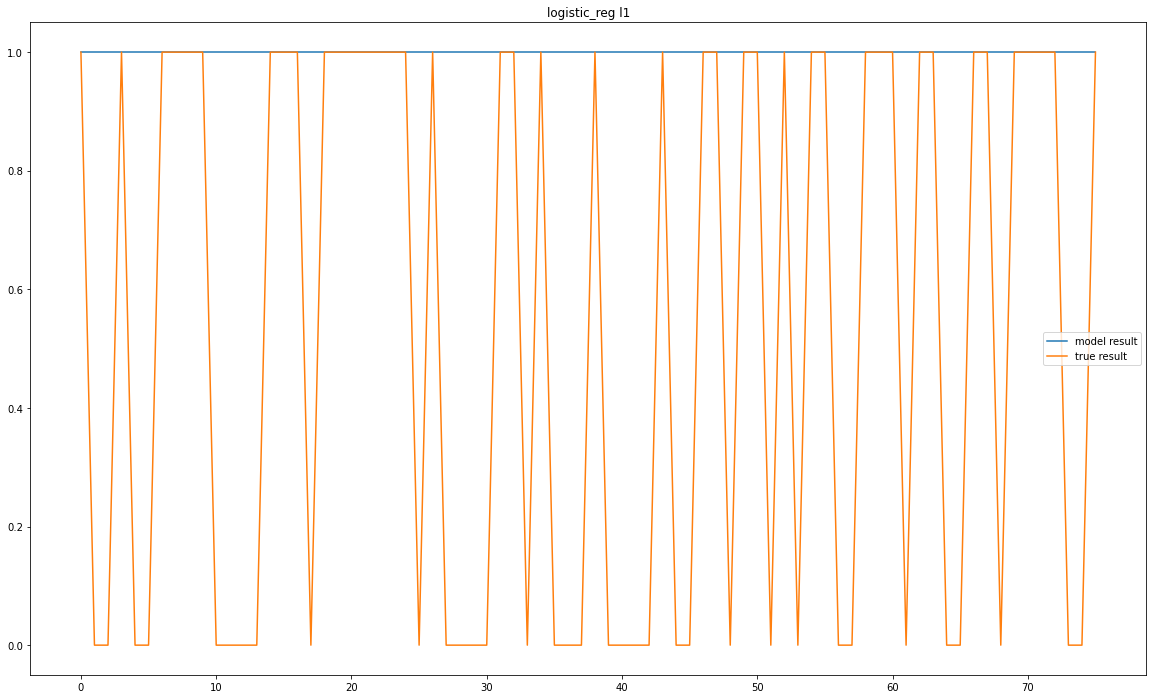

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.6578947368421053
Weight vector: [[-0.01024159  0.          0.         -0.0235816  -0.00378699  0.
   0.          0.03221549  0.          0.          0.          0.        ]]
C =  0.01


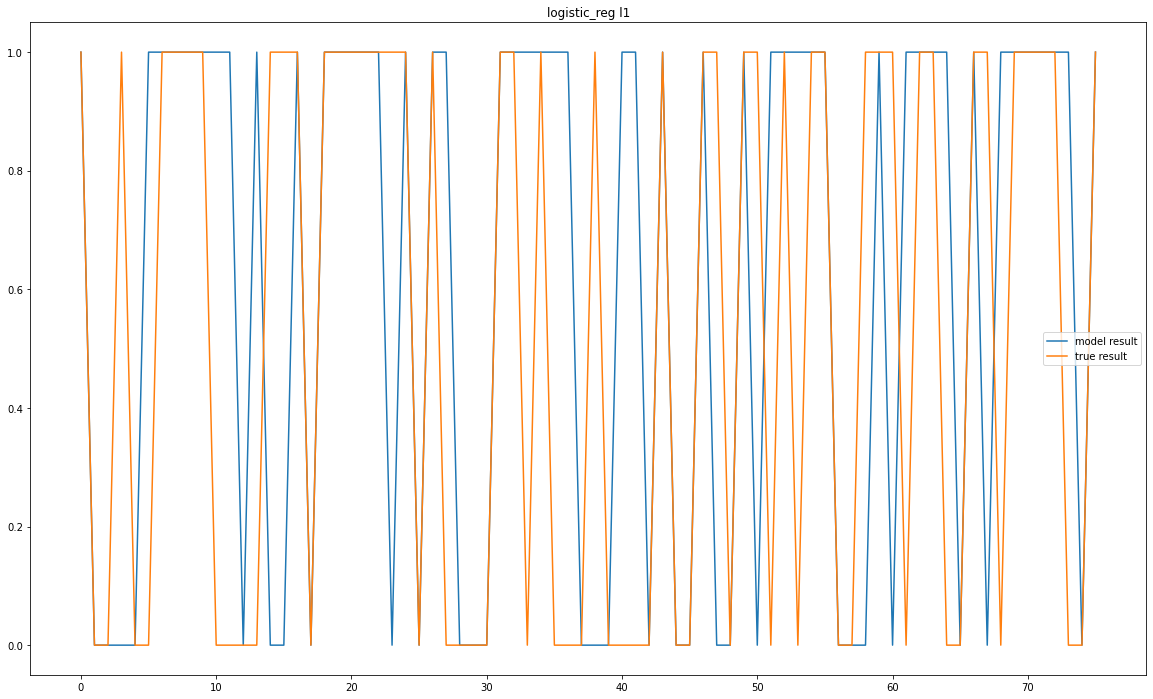

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01005417 -0.39782802  0.51317232 -0.02445072 -0.00252721  0.
   0.          0.03734519  0.          0.         -0.53118021 -0.3657804 ]]
C =  0.1


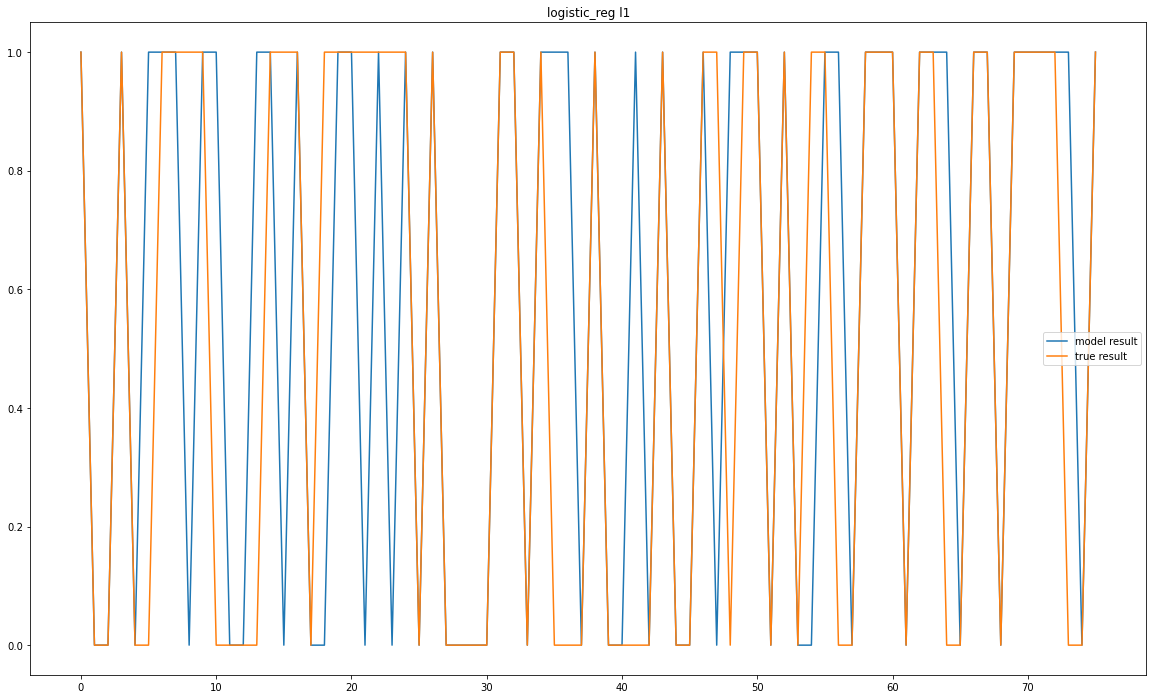

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7631578947368421
Weight vector: [[-0.00388226 -1.75907656  0.73016433 -0.02114687 -0.00310803  0.22531506
   0.37975731  0.04189909 -0.92663982  0.48193348 -0.82351093 -0.84856848]]
C =  1


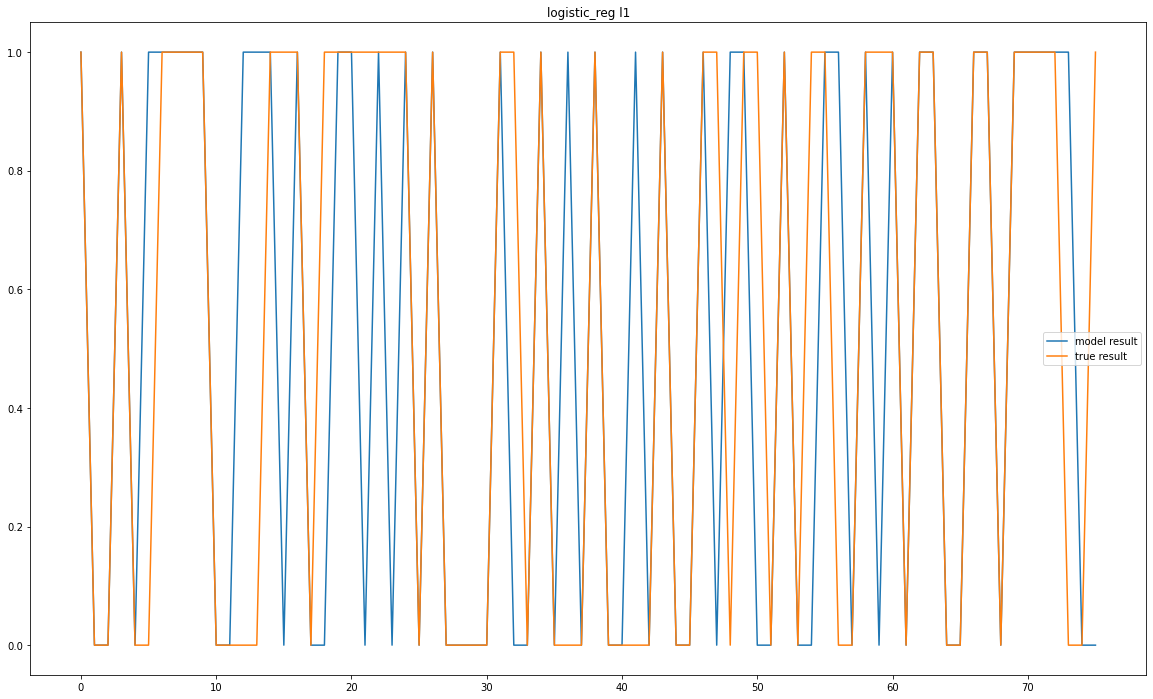

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01336795 -2.17824903  0.77906471 -0.0238585  -0.00396077  0.7069145
   0.47532763  0.03853953 -1.2430372   0.63030668 -0.91239202 -0.95958231]]
C =  10


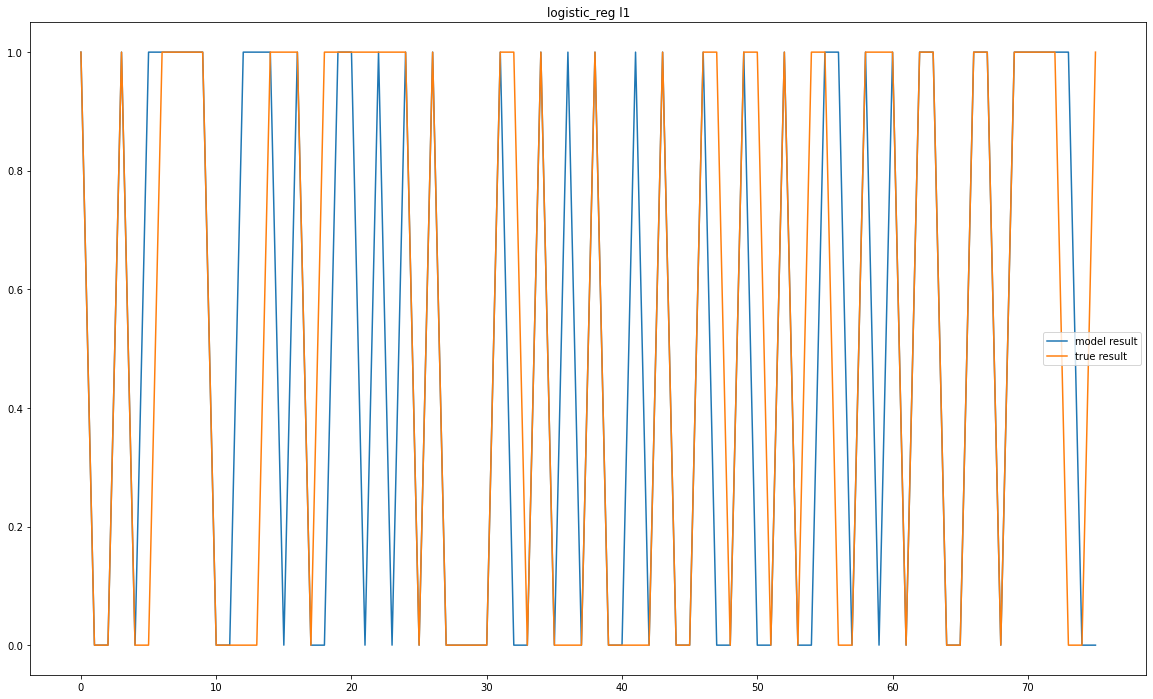

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01786728 -2.25911103  0.78760038 -0.02488443 -0.00429525  0.77334817
   0.46853098  0.03656992 -1.29155469  0.6490278  -0.92422023 -0.98598542]]
C =  100


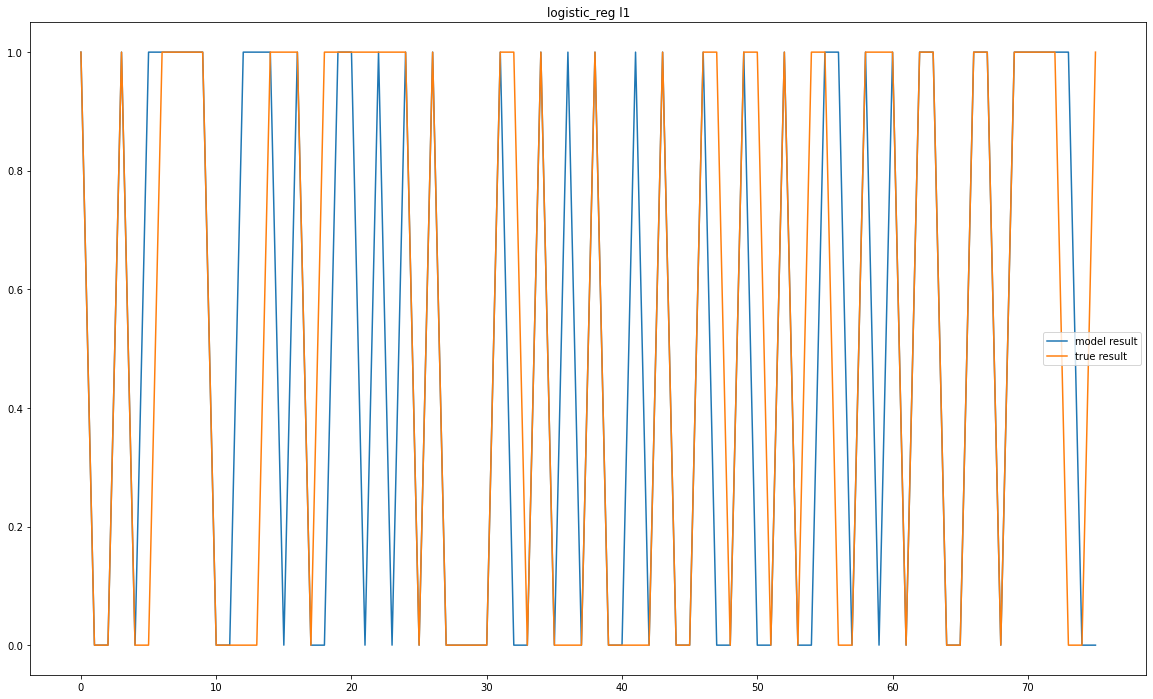

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01838486 -2.26805163  0.78860121 -0.02500021 -0.00433268  0.78031876
   0.46756592  0.03634122 -1.29678278  0.65106682 -0.92552602 -0.98888507]]
C =  1000


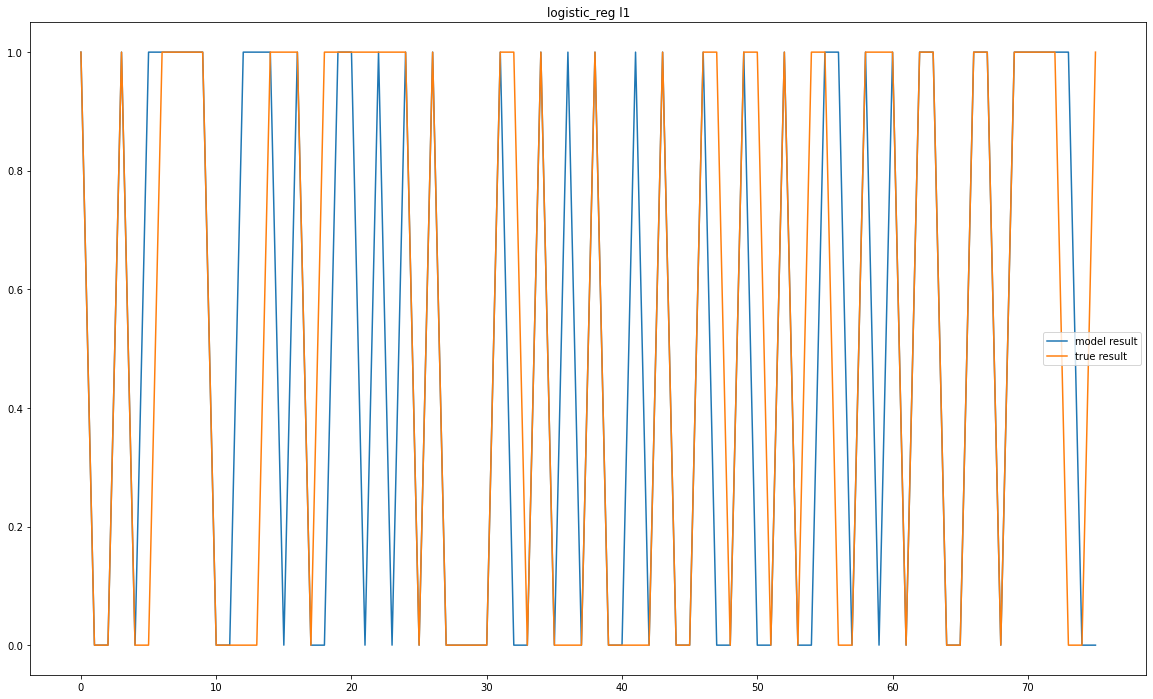

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01843156 -2.26891291  0.78869582 -0.02501118 -0.00433618  0.7810062
   0.46749414  0.03632089 -1.29729371  0.65126377 -0.92565818 -0.98916238]]
C =  10000


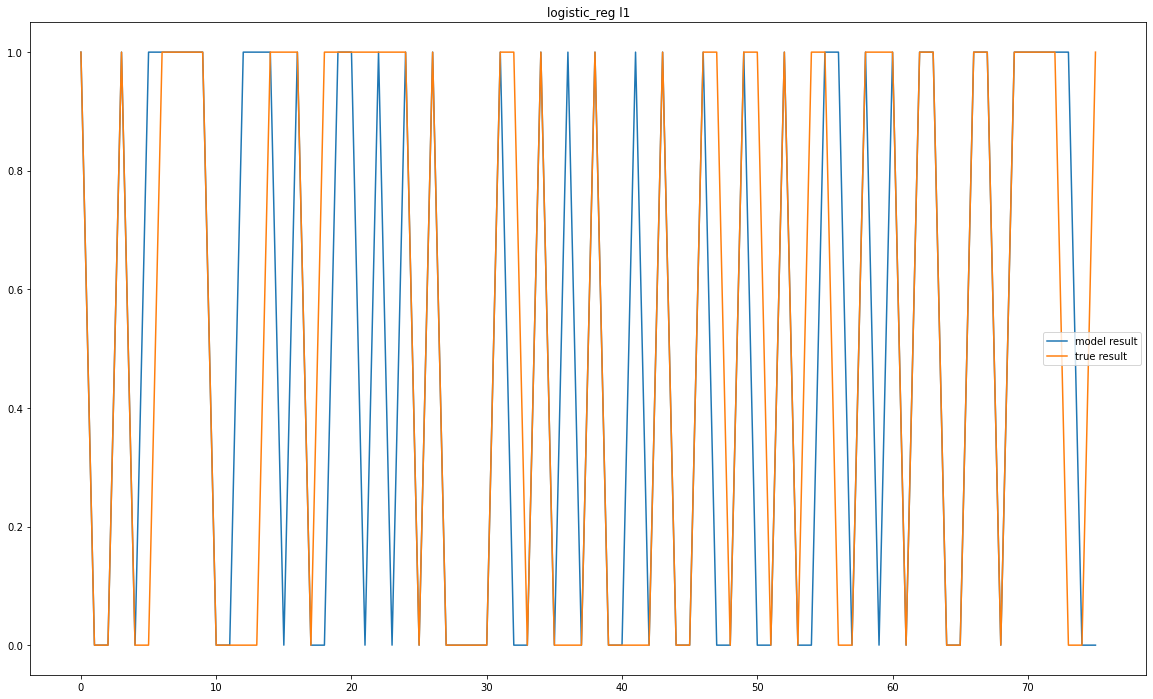

----------------------------------------------------------------------------------------
Score Logistic Regression l1  : 0.7763157894736842
Weight vector: [[-0.01843623 -2.26899909  0.78870528 -0.02501228 -0.00433653  0.78107496
   0.46748696  0.03631886 -1.29734483  0.65128347 -0.92567141 -0.98919012]]
C =  100000


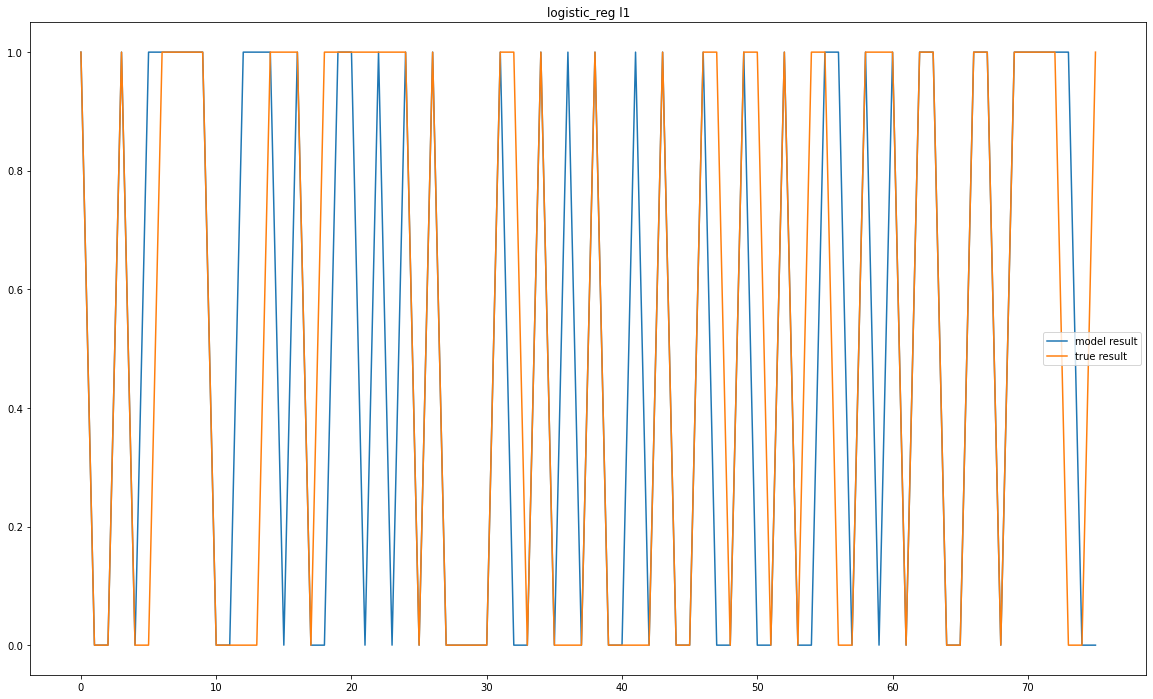

In [21]:
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
l='l1'


for i in range(0, len(C_list)):
    
  logistic_reg(y_train, X_train, y_test, X_test,l, C_list[i])
   


----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.6052631578947368
Weight vector: [[-2.32517545e-03 -1.62610539e-04  4.61287375e-04 -3.46012462e-03
  -2.09232707e-03 -1.29586234e-05  8.85263767e-05  8.63447796e-03
  -1.97833368e-04  1.89948083e-04 -4.88998799e-04 -2.41589387e-04]]
C =  1e-05


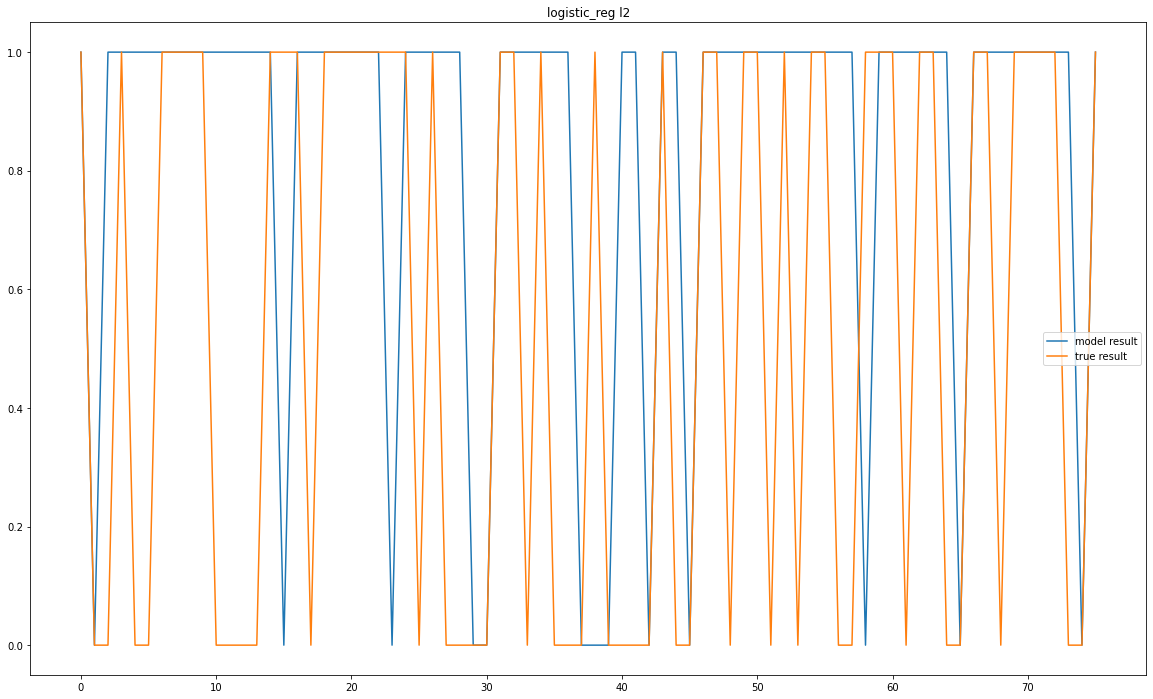

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.6842105263157895
Weight vector: [[-1.13353186e-02 -1.70128294e-03  3.93166421e-03 -1.64259380e-02
  -3.71720135e-03 -2.40722445e-05  6.53874382e-04  2.61826430e-02
  -1.54572419e-03  1.09828905e-03 -4.13338494e-03 -2.34546820e-03]]
C =  0.0001


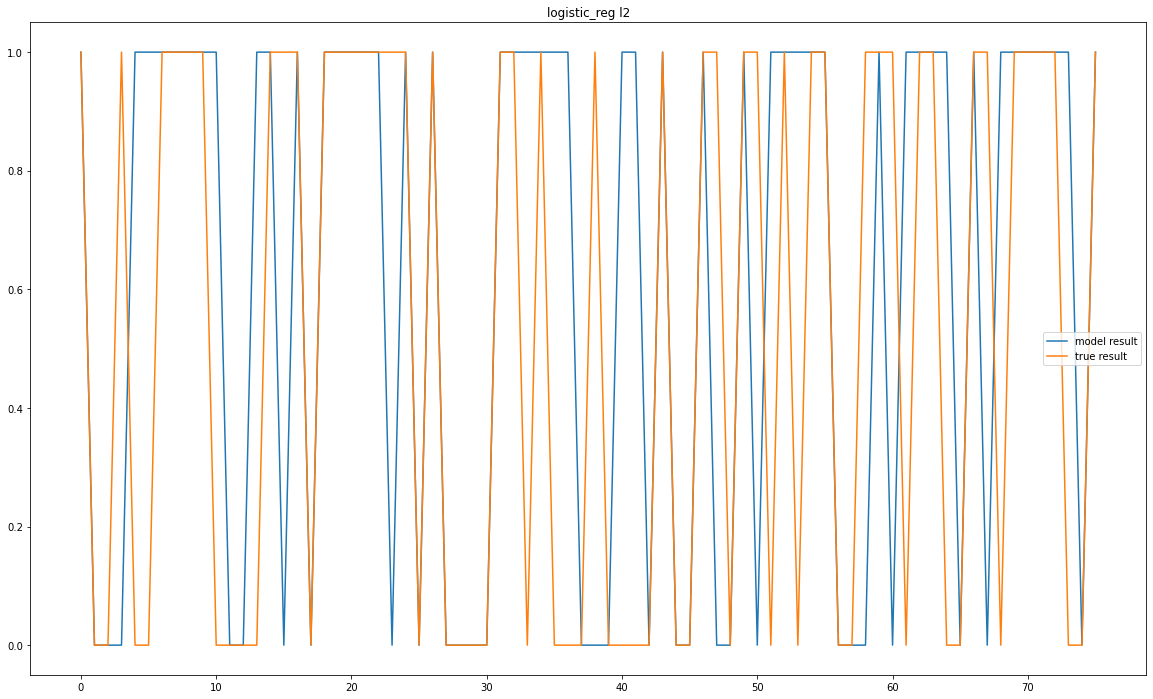

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.6973684210526315
Weight vector: [[-0.02167589 -0.01660793  0.03507731 -0.02382579 -0.00337133  0.00040125
   0.00546356  0.03617452 -0.01286915  0.00727481 -0.03559248 -0.02150454]]
C =  0.001


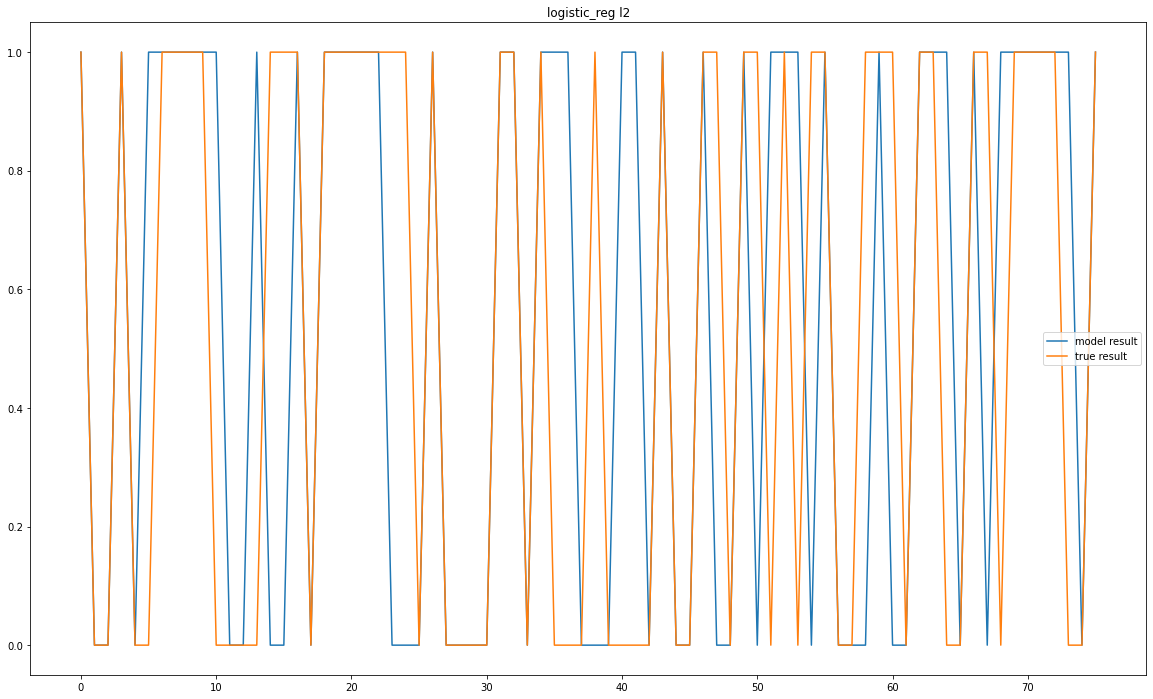

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.75
Weight vector: [[-0.01907426 -0.13846493  0.23190586 -0.02323176 -0.00262193  0.0062265
   0.04598308  0.03540826 -0.09697783  0.05780592 -0.23483433 -0.16107662]]
C =  0.01


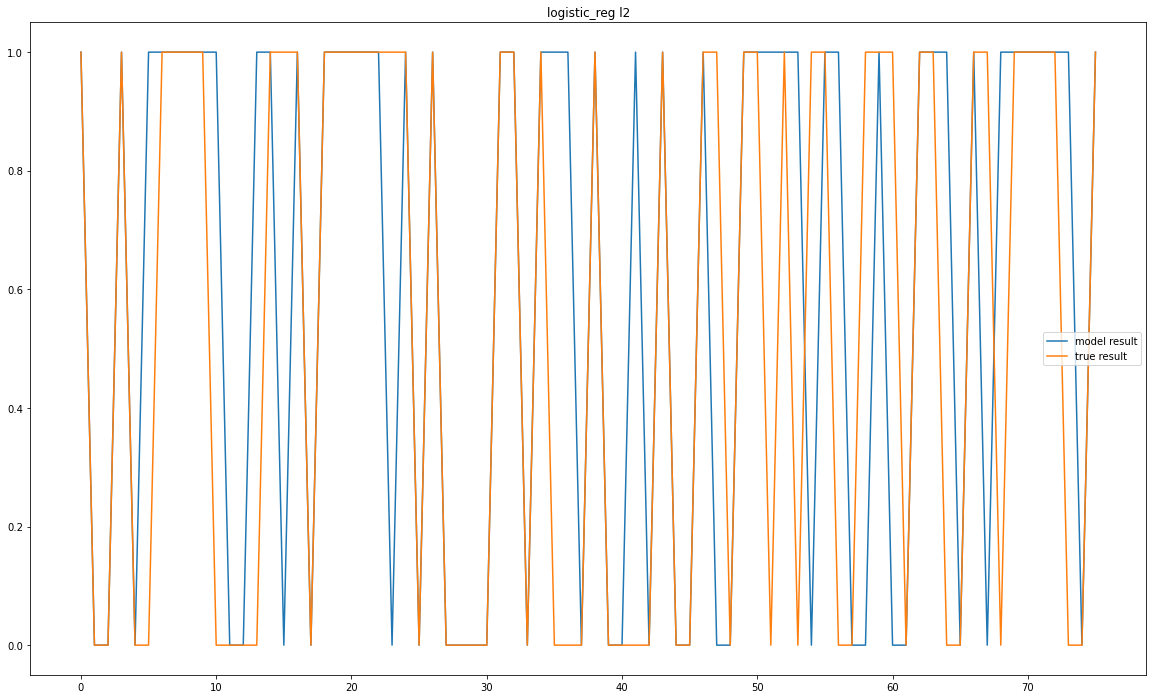

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7894736842105263
Weight vector: [[-0.00816484 -0.68548898  0.56387403 -0.02200838 -0.00206664  0.07202705
   0.23184229  0.03555637 -0.41263288  0.27047247 -0.6196288  -0.57453533]]
C =  0.1


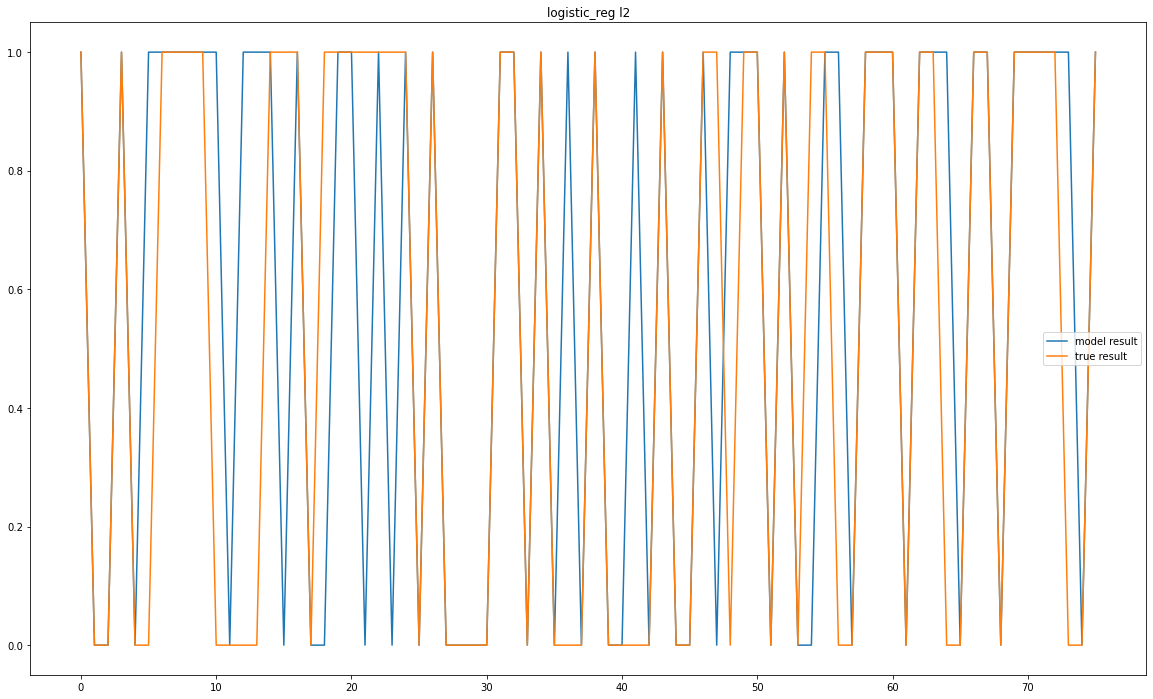

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7631578947368421
Weight vector: [[-0.00485324 -1.63884813  0.72540758 -0.02179336 -0.00278764  0.42068504
   0.45733725  0.04003273 -0.95728098  0.52605311 -0.84139716 -0.87522241]]
C =  1


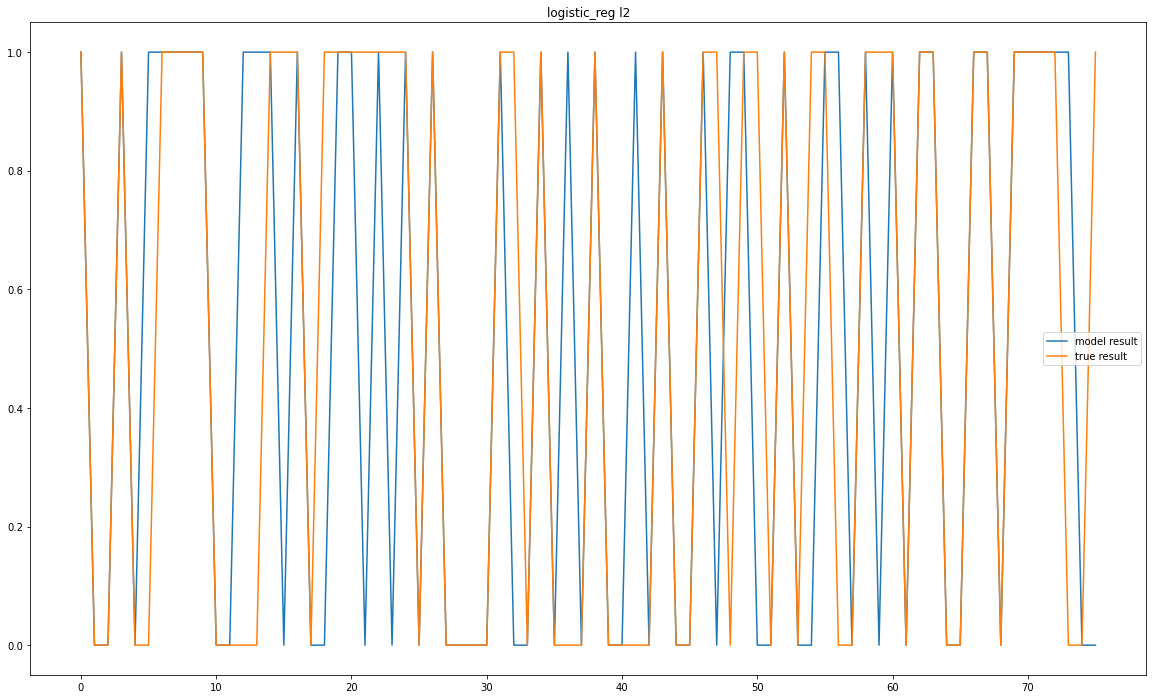

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7631578947368421
Weight vector: [[-0.0106578  -2.12444788  0.77677192 -0.02343192 -0.0037344   0.7008937
   0.49890836  0.03956845 -1.2261955   0.63044392 -0.91275413 -0.95471259]]
C =  10


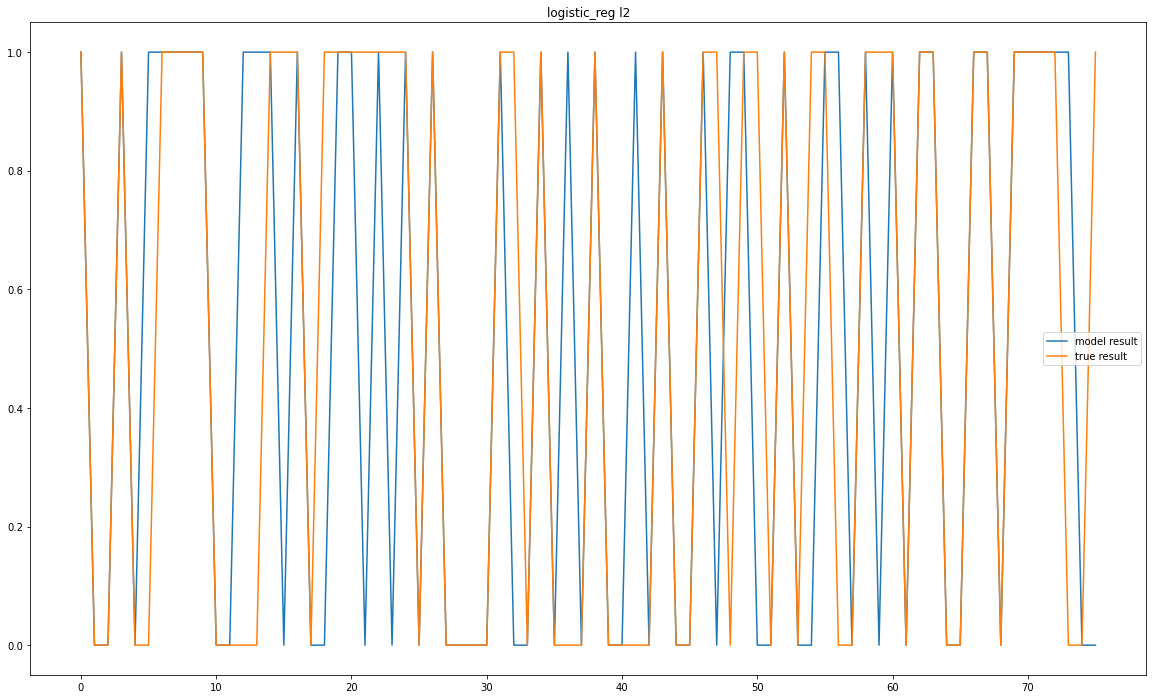

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7763157894736842
Weight vector: [[-0.0170538  -2.25118784  0.7861394  -0.02472754 -0.0042303   0.78475286
   0.47357721  0.03697271 -1.29263571  0.64843559 -0.92492266 -0.98404148]]
C =  100


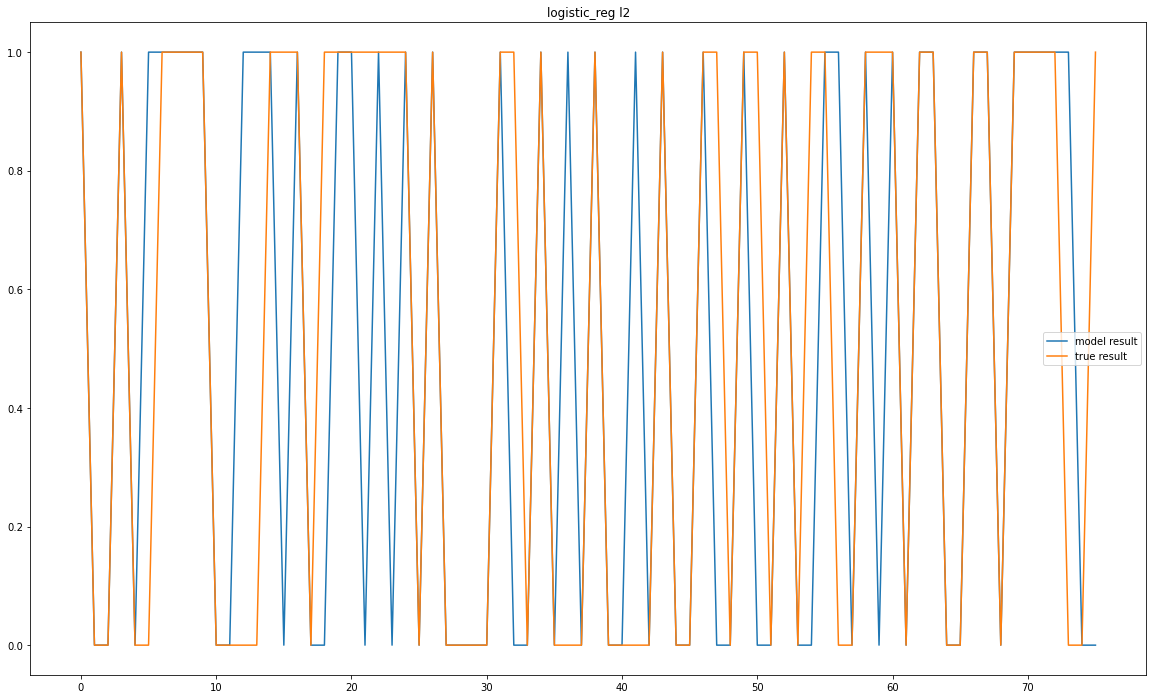

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7763157894736842
Weight vector: [[-0.0183527  -2.26710974  0.78825103 -0.02498779 -0.00432672  0.78249016
   0.46788059  0.036337   -1.2988623   0.65135864 -0.92575596 -0.98876332]]
C =  1000


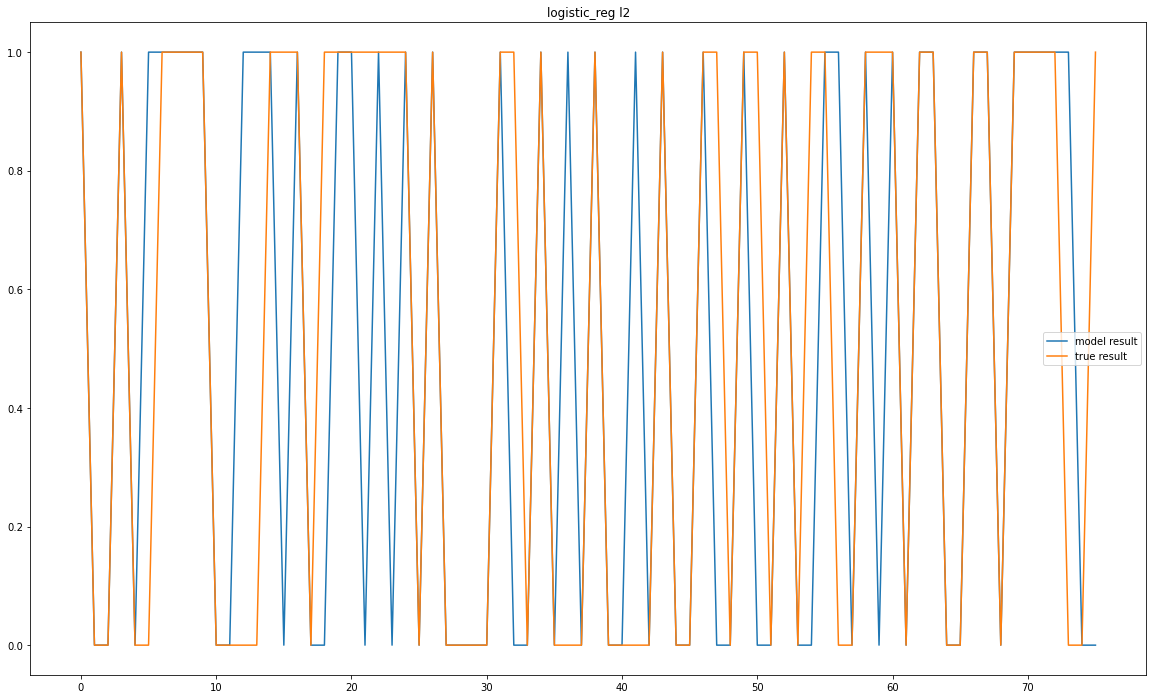

----------------------------------------------------------------------------------------
Score Logistic Regression l2  : 0.7763157894736842
Weight vector: [[-0.01848446 -2.26622147  0.78763707 -0.02498524 -0.00432976  0.77897273
   0.46548862  0.03625974 -1.29946992  0.65149049 -0.92452908 -0.98821611]]
C =  10000


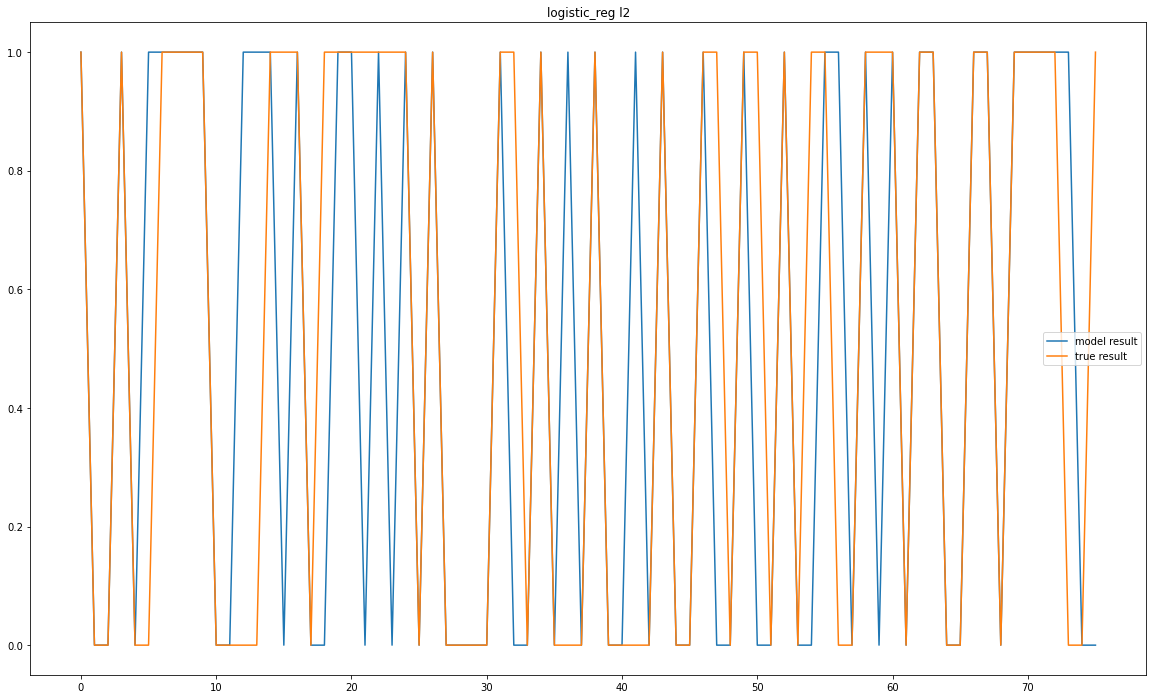

In [ ]:
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**100]
l='l2'


for i in range(0, len(C_list)):
  logistic_reg(y_train, X_train, y_test, X_test,l, C_list[i])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6, shuffle=True, random_state=2)
accuracy = []
C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]


for i in range(0, len(C_list)):
    clf = LogisticRegression(penalty='l1', C=C_list[i], random_state=2, solver='liblinear')
    current_score = cross_val_score(clf, X_train, y_train, cv=kfold).mean()
    accuracy.append(current_score)
    print('При С=', C_list[i], 'точность равна:', current_score)
    
max_score = 0
c_for_max_score = 0
for i in range(0, len(accuracy)):
    if max_score < accuracy[i]:
        max_score = accuracy[i]
        c_for_max_score = i
        
print('\n')
print('Максимальная точность равна:', max_score, 'она получена при С:',  C_list[c_for_max_score])

При С= 1e-05 точность равна: 0.4538880986249407
При С= 0.0001 точность равна: 0.4538880986249407
При С= 0.001 точность равна: 0.5461119013750594
При С= 0.01 точность равна: 0.6827880512091039
При С= 0.1 точность равна: 0.7798719772403983
При С= 1 точность равна: 0.8327406353722143
При С= 10 точность равна: 0.8284732100521576
При С= 100 точность равна: 0.819701280227596
При С= 1000 точность равна: 0.819701280227596
При С= 10000 точность равна: 0.819701280227596
При С= 100000 точность равна: 0.819701280227596


Максимальная точность равна: 0.8327406353722143 она получена при С: 1
